# SALES PREDICTION USING PYTHON

## Description

This project aims to predict the sales of a product based on the amount spent on advertising the product. The sales prediction is a regression problem, and I will use the Linear Regression algorithm to solve this problem.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


## Importing the Dataset

In [2]:
df = pd.read_csv('Advertising.csv')
df

,Id,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


Viewing first 10 rows of the dataset

In [3]:
df.head(10)

,Id,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


## Data Preprocessing

Check null values

In [5]:
df.isnull().sum()

Id           0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

There are no null values.

Drop the id column as it is not needed.

In [6]:
df2 = df.drop(columns="Id")

In [7]:
df2.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
df2.shape

(200, 4)

## Visualizing the Data

### Relationship between the Features and the Response

1. TV vs Sales

<Axes: xlabel='Sales', ylabel='TV'>

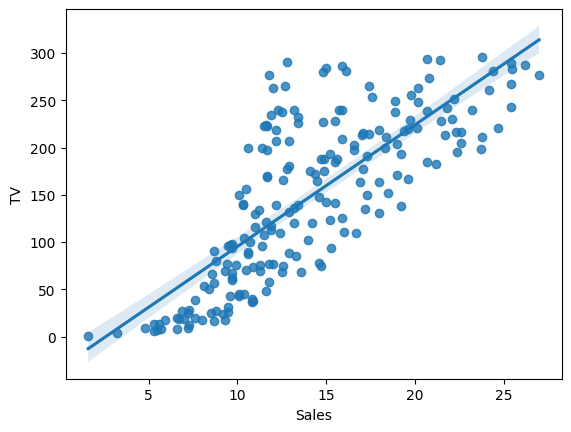

In [9]:
sns.regplot(data=df2, x="Sales", y="TV")

2. Radio vs Sales

<Axes: xlabel='Sales', ylabel='Radio'>

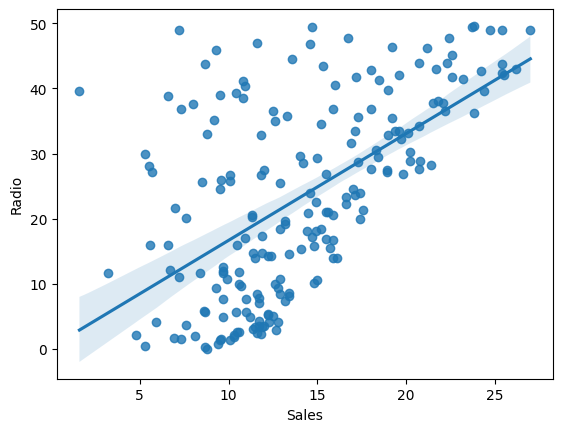

In [10]:
sns.regplot(data=df2, x="Sales", y="Radio")


3. Newspaper vs Sales

<Axes: xlabel='Sales', ylabel='Newspaper'>

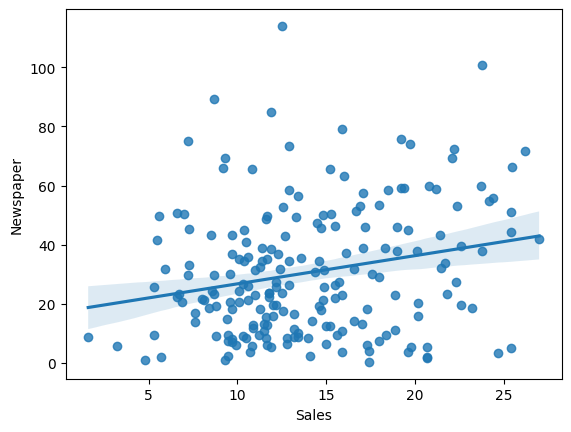

In [11]:
sns.regplot(data=df2, x="Sales", y="Newspaper")


### Only TV advertising can be seen to have a more sales out of all advertising platforms.

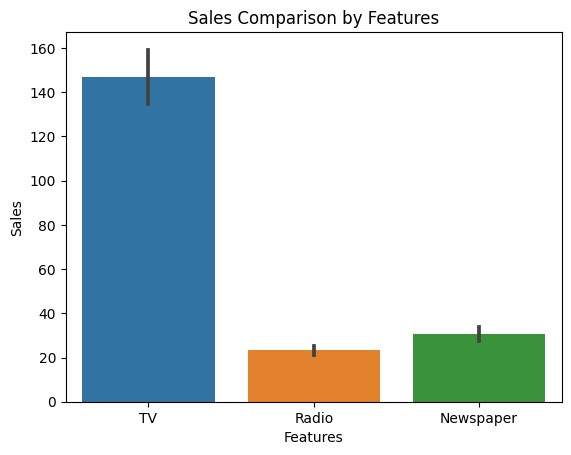

In [12]:
# Extract the relevant columns
df_subset = df2[["TV", "Radio", "Newspaper"]]

# Plot the bar chart
sns.barplot(data=df_subset)

# Set labels and title
plt.xlabel("Features")
plt.ylabel("Sales")
plt.title("Sales Comparison by Features")

# Show the plot
plt.show()


Finally, let's check out the correlations between variables. This will help us determine which variables are collinear.

In [13]:
corr = df2.corr()
print(corr["Sales"])

TV           0.782224
Radio        0.576223
Newspaper    0.228299
Sales        1.000000
Name: Sales, dtype: float64


## Sales Prediction Model

### Splitting the Dataset into Dependent and Independent Variables

In [14]:
x = df2.drop(columns="Sales")
y = df2["Sales"]

### Splitting the data into training and testing sets

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [17]:
y_pred = model.predict(x_test)
y_pred

array([21.73577184, 16.45693776,  7.65993185, 17.89202679, 18.67730671,
       23.86271904, 16.33623628, 13.45649226,  9.177296  , 17.36056228,
       14.4677995 ,  9.85697601, 17.26057027, 16.71866935, 15.09530285,
       15.58923732, 12.45188167, 17.27925151, 11.0944114 , 18.06889853,
        9.33433055, 12.91345761,  8.7842804 , 10.46670654, 11.40303174,
       15.03104665,  9.78479388, 19.46028647, 18.22954934, 17.1958903 ,
       21.60304218, 14.71901407, 16.29205532, 12.36432281, 19.98831261,
       15.37556411, 13.96678297, 10.06809496, 20.97197274,  7.45877832])

In [18]:
# features = [[TV, Radio, Newspaper]]
features = np.array([[500, 60, 99]])
print(model.predict(features))


[37.29819166]


### Error Metrics

In [19]:
from sklearn.metrics import r2_score, mean_squared_error

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

print("R-squared:", round(r2,2)*100, "%")
print("Mean Squared Error:", round(mse,2))


R-squared: 89.0 %
Mean Squared Error: 1.99


### In summary, with an R-squared value of 89% and a relatively low MSE of 1.9919, it seems that the linear regression model has a good fit to the data and can make reasonably accurate predictions for the Sales variable based on the given features.